<a href="https://colab.research.google.com/github/carvalheirafc/deep_learning_stuff/blob/master/diabetes_stats_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

In [40]:
diabetes = pd.read_excel('diabetes_Ex1.xlsx')

diabetes = diabetes.drop(['Unnamed: 16'], axis=1)
diabetes = diabetes[:-8]
diabetes['C'] = pd.to_numeric(diabetes['C']) 
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 17 columns):
A              768 non-null float64
B              768 non-null float64
C              768 non-null int64
D              768 non-null float64
E              768 non-null float64
F              768 non-null float64
G              768 non-null float64
H              768 non-null float64
I              768 non-null float64
J              768 non-null float64
K              768 non-null float64
L              768 non-null float64
M              768 non-null float64
N              768 non-null float64
O              768 non-null float64
P              768 non-null float64
Diagnóstico    768 non-null float64
dtypes: float64(16), int64(1)
memory usage: 102.1 KB


In [63]:
# Maybe remove outliers before do this...
X_norm =  stats.zscore(diabetes)
diabetes_norm = pd.DataFrame(data=X_norm, columns=diabetes.columns)
diabetes_norm.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Diagnóstico
0,0.639947,0.988291,0.848324,0.149641,0.907270,-0.692891,0.204013,-0.935811,-0.713073,0.384589,0.706414,0.706414,1.425995,-0.872551,-1.648132,-1.024990,1.365896
1,-0.844885,-0.678734,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-1.239490,-0.824449,-0.217581,-0.876149,-0.876149,-0.190672,-1.309843,1.060353,0.405006,-0.732120
2,1.233880,0.810475,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,-1.409734,-1.269957,0.685675,1.351162,1.351162,-0.105584,-1.281982,1.737474,-0.085659,1.365896
3,-0.844885,-0.723188,-0.998208,-0.160546,0.154533,0.123302,-0.494043,1.521230,1.403087,-0.819752,-0.993376,-0.993376,-1.041549,1.448520,-0.068182,-0.997333,-0.732120
4,-1.141852,0.032530,0.504055,-1.504687,0.907270,0.765836,1.409746,1.843314,1.662966,5.503039,-0.055561,-0.055561,-0.020496,1.873203,-1.460043,-0.990674,1.365896


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


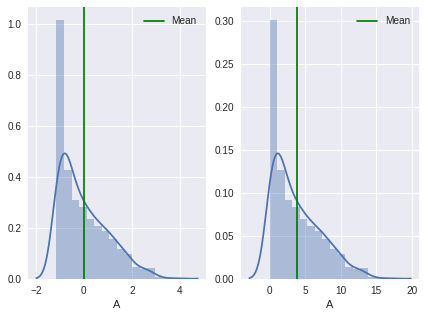

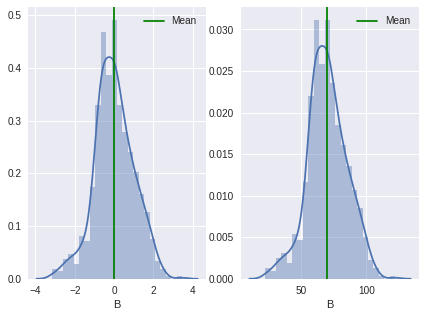

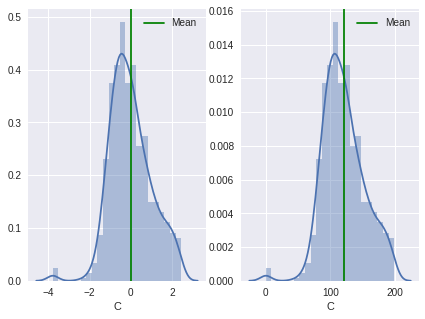

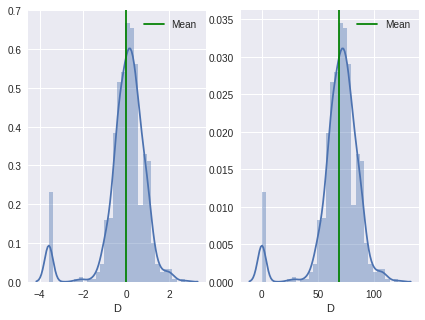

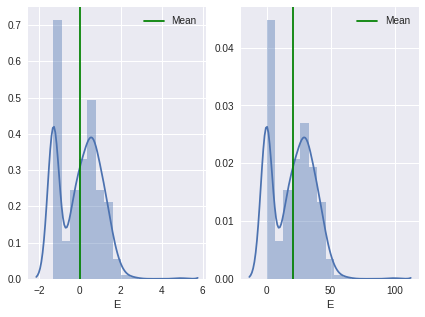

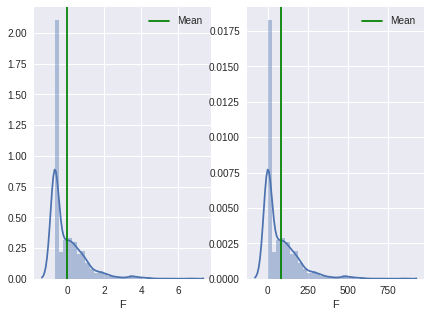

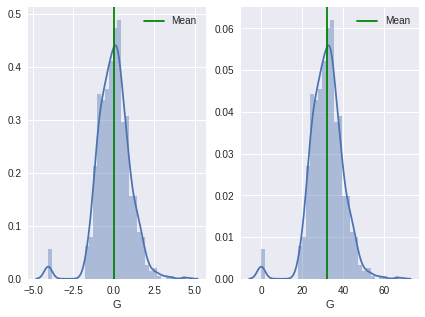

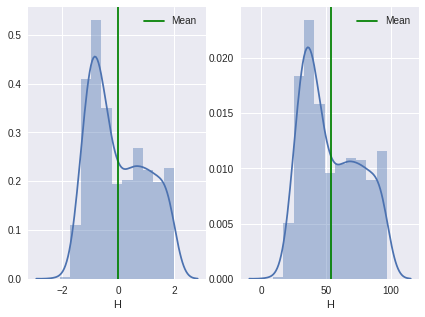

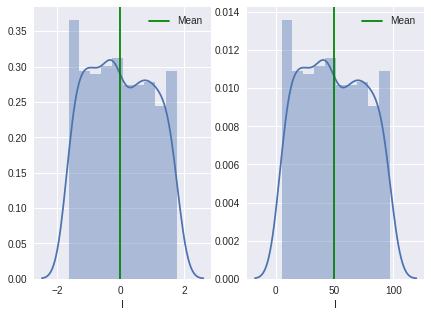

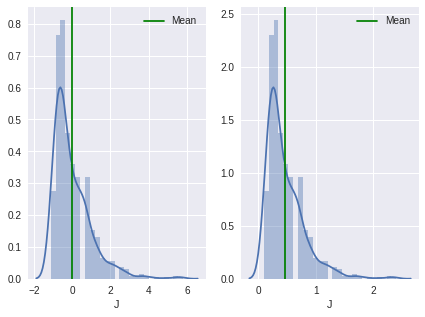

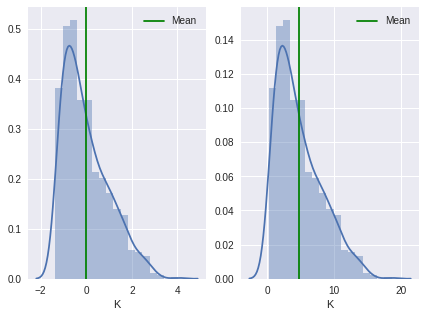

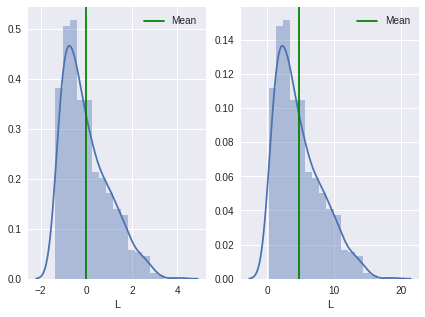

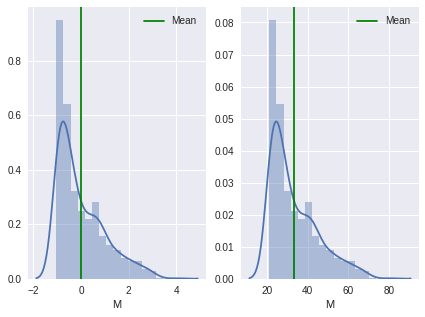

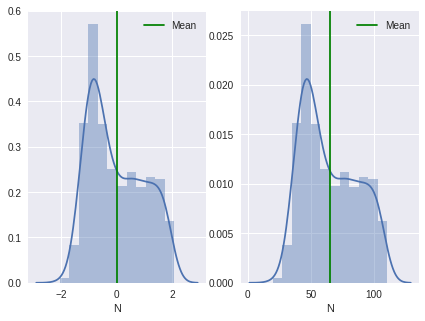

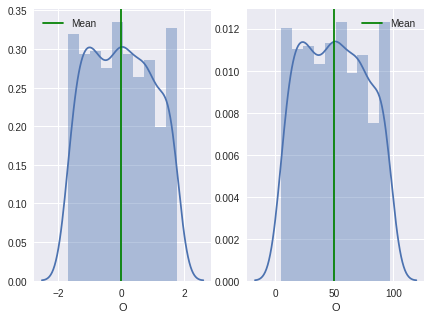

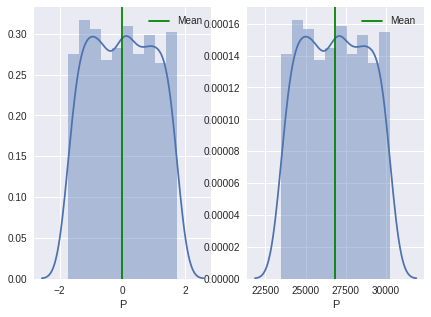

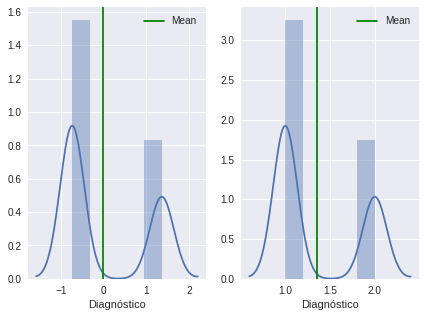

In [85]:
for column in diabetes_norm.columns:
  fig, ax = plt.subplots(1,2, figsize=(7,5))
  
  ax_norm = sns.distplot(diabetes_norm[column], ax=ax[0])
  ax_norm.axvline(diabetes_norm[column].mean(), color='g', label='Mean')
  ax_norm.legend()
  
  ax1 = sns.distplot(diabetes[column], ax=ax[1])
  ax1.axvline(diabetes[column].mean(), color='g', label='Mean')
  ax1.legend()
  
  
  plt.show()